In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
try:
    df = pd.read_csv('train.csv')
    print("Data loaded successfully.")
    print("Dataset shape:", df.shape)
except FileNotFoundError:
    print("Error: 'train.csv' not found. Please download it from Kaggle")
    print("https://www.kaggle.com/competitions/titanic/data")
    exit()

Data loaded successfully.
Dataset shape: (891, 12)


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


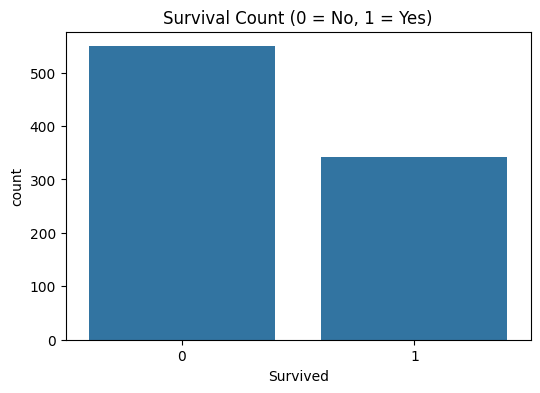

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

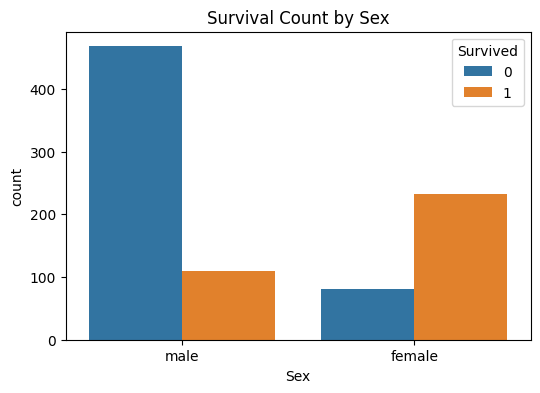

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Sex')
plt.show()

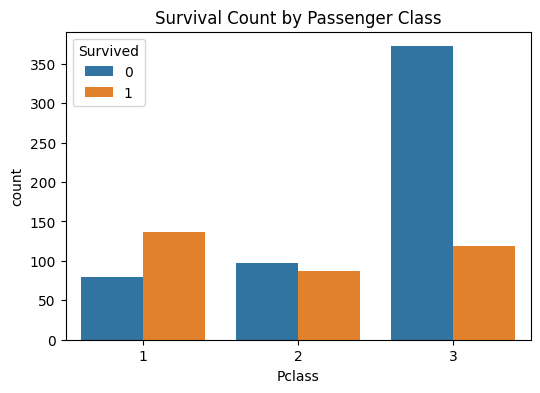

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()

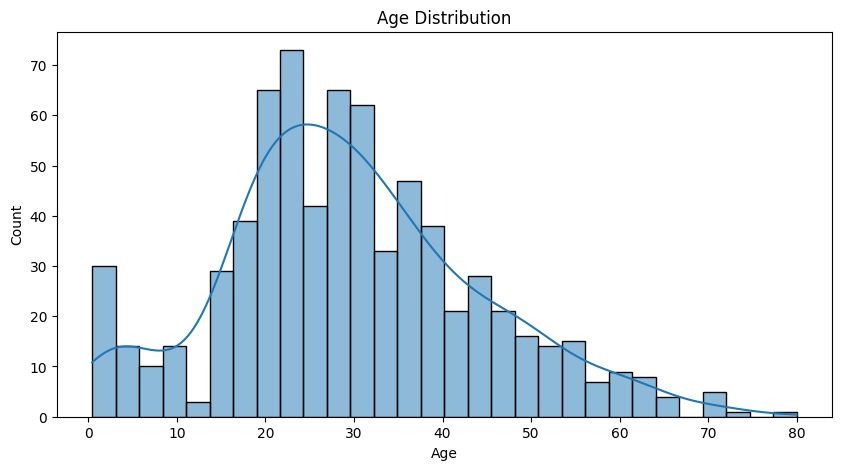

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

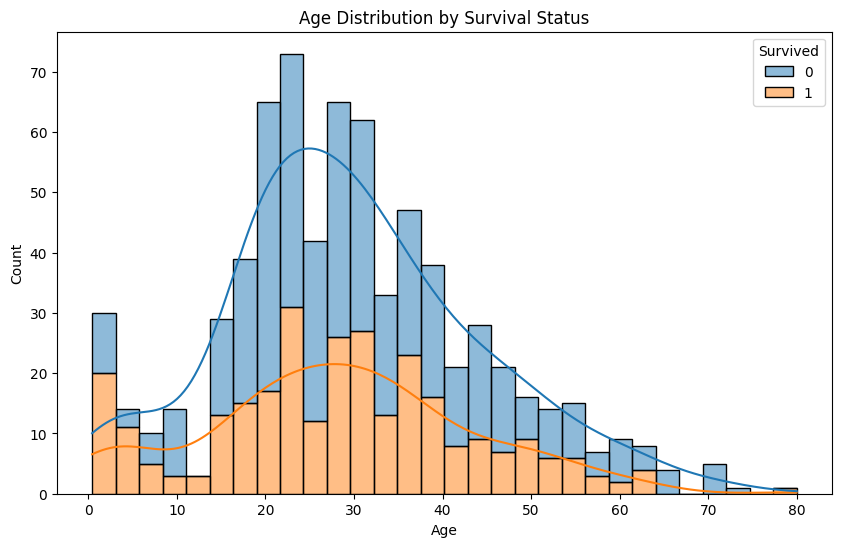

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30, multiple="stack")
plt.title('Age Distribution by Survival Status')
plt.show()

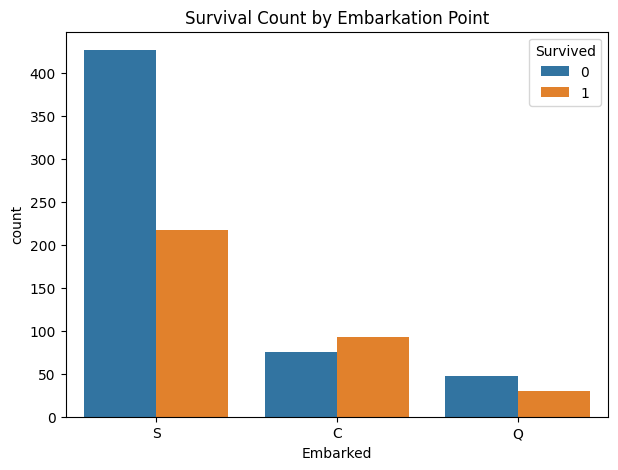

In [12]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarkation Point')
plt.show()

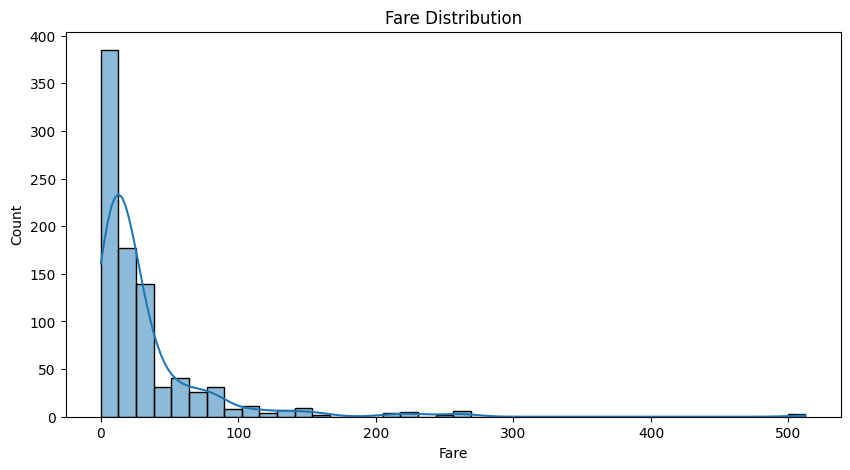

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Fare'], kde=True, bins=40)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()

In [14]:
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)
print(f"Filled missing 'Age' values with median: {median_age:.2f}")

mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)
print(f"Filled missing 'Embarked' values with mode: {mode_embarked}")

df['Has_Cabin'] = df['Cabin'].notna().astype(int)
df.drop('Cabin', axis=1, inplace=True)
print("Created 'Has_Cabin' feature and dropped 'Cabin' column.")


Filled missing 'Age' values with median: 28.00
Filled missing 'Embarked' values with mode: S
Created 'Has_Cabin' feature and dropped 'Cabin' column.


<ipython-input-14-1f4666af7802>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
<ipython-input-14-1f4666af7802>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [15]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked', drop_first=True)

df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
print("Dropped 'Name', 'Ticket', 'PassengerId' columns.")


Dropped 'Name', 'Ticket', 'PassengerId' columns.


In [16]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Has_Cabin,0
Embarked_Q,0
Embarked_S,0


In [17]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [18]:
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [19]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Has_Cabin,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,0,3,0,22.0,7.2500,0,False,True,2,0
1,1,1,1,38.0,71.2833,1,False,False,2,0
2,1,3,1,26.0,7.9250,0,False,True,1,1
3,1,1,1,35.0,53.1000,1,False,True,2,0
4,0,3,0,35.0,8.0500,0,False,True,1,1


In [20]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
print("\nTraining Logistic Regression model...")
log_reg = LogisticRegression(max_iter=1000, random_state=42) # Increase max_iter if it doesn't converge
log_reg.fit(X_train, y_train)
print("Logistic Regression model trained.")


Training Logistic Regression model...
Logistic Regression model trained.


In [23]:
print("\nTraining Random Forest model...")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5, min_samples_leaf=5) # Added some hyperparameters
rf_clf.fit(X_train, y_train)
print("Random Forest model trained.")


Training Random Forest model...
Random Forest model trained.



--- Logistic Regression Performance ---
Accuracy: 0.7933

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       110
           1       0.74      0.72      0.73        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179


Confusion Matrix:
[[92 18]
 [19 50]]


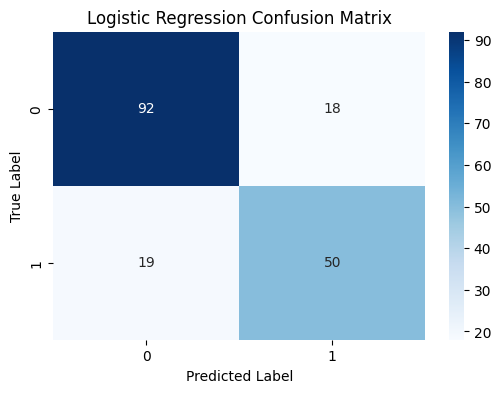

In [24]:
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("\n--- Logistic Regression Performance ---")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


--- Random Forest Performance ---
Accuracy: 0.7989

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       110
           1       0.81      0.62      0.70        69

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179


Confusion Matrix:
[[100  10]
 [ 26  43]]


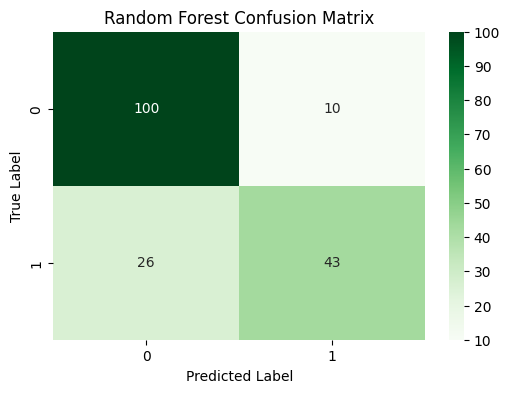

In [25]:
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\n--- Random Forest Performance ---")
print(f"Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [26]:
importances = rf_clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

      Feature  Importance
1         Sex    0.477927
3        Fare    0.138137
0      Pclass    0.123226
2         Age    0.091522
4   Has_Cabin    0.074858
7  FamilySize    0.053105
6  Embarked_S    0.017211
8     IsAlone    0.014251
5  Embarked_Q    0.009763


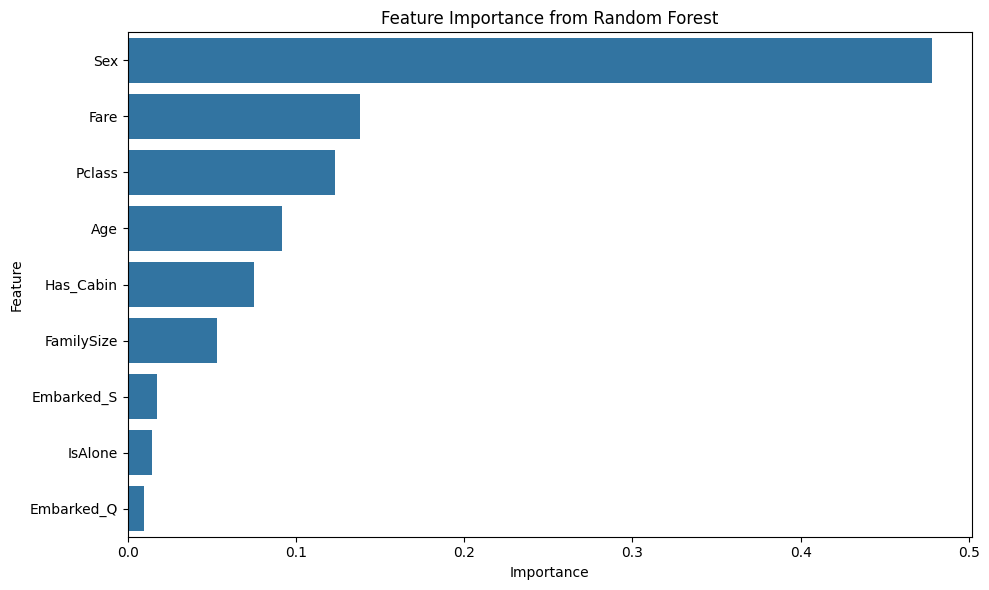

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()

In [28]:
print("\n--- Analysis Complete ---")
print("Key findings usually show 'Sex' (female having higher survival), 'Pclass' (higher class higher survival),")
print("and engineered features like 'FamilySize' or 'Age' play significant roles.")
print(f"The models achieved accuracies around {accuracy_log_reg:.2f} (Logistic Regression) and {accuracy_rf:.2f} (Random Forest).")
print("Further improvements could involve more advanced feature engineering, hyperparameter tuning, or different models.")


--- Analysis Complete ---
Key findings usually show 'Sex' (female having higher survival), 'Pclass' (higher class higher survival),
and engineered features like 'FamilySize' or 'Age' play significant roles.
The models achieved accuracies around 0.79 (Logistic Regression) and 0.80 (Random Forest).
Further improvements could involve more advanced feature engineering, hyperparameter tuning, or different models.
